# Часть 1 

### Подключаем библиотеки, display и Math для визуализации формул, numpy - для построения графиков (понадобится позже)

In [97]:
from IPython.display import display, Math
import numpy as np

### Определяем функцию для создания узла дерева для хранения целых чисел

In [98]:
def integer_(x: int) -> tuple:
  return 'integer', {'value': x}

a = integer_(-34)
a

('integer', {'value': -34})

### Определите функции для доступа к компонентам узла дерева выражения:
* ID(x) - возвращает идентификатор узла
* items(x) - возвращает список дочерних узлов
* options(x) - возвращает словарь с параметрами узла
* isTerminal(x) - возвращает True, если узел --- лист, т.е. не содержит дочерних узлов

*Замените ... в каждой функции на нужное выражение*

In [99]:
def ID(x: tuple) -> str:
  return x[0]

def items(x: tuple) -> list:
  return x[1:-1]

def options(x: tuple) -> dict:
  return x[-1]

def isTerminal(x: tuple) -> bool:
  return len(x) == 2

ID(a), items(a), options(a), isTerminal(a)

('integer', (), {'value': -34}, True)

### Определяем функции для преобразования узла в LaTeX-выражение

In [100]:
def latex_(x: tuple) -> str:
  cmd = eval(f"latex_{ID(x)}")
  return cmd(x)

def latex_integer(x: tuple) -> str:
  return f"{options(x)['value']}"

latex_(a)

'-34'

### Определяем функцию show_ для визуализации формулы, представленной деревом x

In [101]:
def show_(x: tuple) -> None:
  display(Math(latex_(x)))

show_(integer_(-123))
print(-123)

<IPython.core.display.Math object>

-123


### Символы
* определяем функцию для генерации узла дерева: дополните список греческих букв, см. [ссылку](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols)
* определяем функцию преобразования символа в LaTeX-формат
* тестируем обе функции

In [102]:
def symbol_(x: str) -> tuple:
  greek = ['alpha', 'beta', 'gamma', 'Gamma', 'delta', 'Delta', 'epsilon', 'zeta', 'eta', 'theta', 'Theta', 'iota', 
           'kappa', 'lambda', 'Lambda', 'mu', 'nu', 'xi', 'Xi', 'pi', 'Pi', 'rho', 'sigma', 'Sigma', 'tau', 'upsilon', 
           'Upsilon', 'phi', 'Phi', 'chi', 'psi', 'Psi', 'omega', 'Omega']
  n, s = x.split('_') if '_' in x else (x, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'symbol', {'name': x, 'latex': n}

def latex_symbol(x: tuple) -> str:
  return options(x)['latex']

x, alpha, omega, phi = symbol_('x_1'), symbol_('alpha'), symbol_('Omega'), symbol_('psi')
show_(x)
show_(alpha)
show_(omega)
show_(phi)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Определяем функции генерации узлов для бинарных и унарных операций
* напишите по аналогии с функцией add_ функции для остальных бинарных операций: вычитания (sub), умножения (mul), деления (div), возведения в степень (deg); логических операций (and, or, xor); операций сравнения (eq, ne, lt, le, gt, ge)
* напишите по аналогии с функцией neg_ функцию для логического отрицания (inv)

In [103]:
def add_(x: tuple, y: tuple) -> tuple:
  return 'add', x, y, {}

def sub_(x: tuple, y: tuple) -> tuple:
  return 'sub', x, y, {}

def mul_(x: tuple, y: tuple) -> tuple:
  return 'mul', x, y, {}

def div_(x: tuple, y: tuple) -> tuple:
  return 'div', x, y, {}

def deg_(x: tuple, y: tuple) -> tuple:
  return 'deg', x, y, {}

def and_(x: tuple, y: tuple) -> tuple:
  return 'and', x, y, {}

def or_(x: tuple, y: tuple) -> tuple:
  return 'or', x, y, {}

def xor_(x: tuple, y: tuple) -> tuple:
  return 'xor', x, y, {}

def eq_(x: tuple, y: tuple) -> tuple:
  return 'eq', x, y, {}

def ne_(x: tuple, y: tuple) -> tuple:
  return 'ne', x, y, {}

def lt_(x: tuple, y: tuple) -> tuple:
  return 'lt', x, y, {}

def le_(x: tuple, y: tuple) -> tuple:
  return 'le', x, y, {}

def gt_(x: tuple, y: tuple) -> tuple:
  return 'gt', x, y, {}

def ge_(x: tuple, y: tuple) -> tuple:
  return 'ge', x, y, {}

def neg_(x: tuple) -> tuple:
  return 'neg', x, {}

def inv_(x: tuple) -> tuple:
  return 'inv', x, {}

### Тестируем операции
* создаем целое число a=34 и символы $x$ и $y$
* создаем дерево выражения f=(a+x)*y, используя вышенаписанные функции для бинарных операций
* печатаем это выражение (print)

In [104]:
a = integer_(34)
x = symbol_('x')
y = symbol_('y')
f = add_(mul_(a, x), y)
print(f)

('add', ('mul', ('integer', {'value': 34}), ('symbol', {'name': 'x', 'latex': 'x'}), {}), ('symbol', {'name': 'y', 'latex': 'y'}), {})


### Создаем словарь с приоритетами всех операций
* в соответствии с приоритетами этих же операций в языке Python: см. [ссылку](https://www.programiz.com/python-programming/precedence-associativity), приоритет логических операций and, or, xor определяется как для побитовых (bitwise) операций (&, |, ^)
* конкретные значения приоритетов не важны, важны их относительные значения
* создаем функцию для вычисления приоритета заданного узла
* найдите приоритет выражения (a+x)*y из предыдущего пункта

In [105]:
priority = {'deg': 9, 'neg': 8, 'mul': 7, 'div': 7, 'add': 6, 'sub': 6, 'and': 5, 'xor': 4, 'or': 3, 'eq': 2, 'ne': 2, 'lt': 2, 'le': 2, 'gt': 2, 'ge': 2, 'inv': 1}

def Pr(x: tuple) -> int:
  return priority.get(ID(x), 10)

print(Pr(f))

6


### Определяем функцию "оборачивания" заданного LaTeX-выражения в круглые скобки "адаптивного" размера

Сравните размер скобок: `(\frac{x^2}{y^3})` $\to (\frac{x^2}{y^3})$ и `\left(\frac{x^2}{y^3}\right)` $\to \left(\frac{x^2}{y^3}\right)$

In [106]:
def enclose(x: str) -> str:
  return f"\\left( {x} \\right)"

### Определяем функции преобразования всех введенных бинарных и унарных операций в формат LaTeX
* отдельным образом определяются операции возведения в степень $x^y$ и деления $\frac{x}{y}$
* для логических операций используем обозначения $\neg x$, $x \wedge y$, $x \vee y$, $x \oplus y$
* чтобы посмотреть код этой вкладки, сделайте ЗДЕСЬ двойной клик

In [107]:
def latex_add(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} + {b}"

def latex_mul(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\cdot {b}"

def latex_sub(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x) or ID(x[2]) == 'neg':  # взятие в скобки, если в вычитаемом есть унарный минус
    b = enclose(b)
  return f"{a} - {b}"

def latex_div(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  return f"\\frac{{{a}}}{{{b}}}"

def latex_deg(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x) or (ID(x[1]) == 'rational' and options(x[1])['num'] != 0 and options(x[1])['denom'] != 1):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a}^{b}"

def latex_neg(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) == 'integer' and options(x[1])['value'] < 0:  # взятие в скобки, если число после унарного минуса отрицательное
    a = enclose(a)
  return f"-{a}"

def latex_inv(x: tuple) -> str:
  a = latex_(x[1])
  return f"\\neg {a}"

def latex_and(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\wedge {b}"

def latex_or(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\vee {b}"

def latex_xor(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\oplus {b}"

def latex_eq(x:tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} = {b}"

def latex_ne(x:tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\ne {b}"

def latex_lt(x:tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} < {b}"

def latex_le(x:tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \leq {b}"

def latex_gt(x:tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} > {b}"

def latex_ge(x:tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \geq {b}"

show_(f)

<IPython.core.display.Math object>

### Протестируйте определенные функции на различных выражениях
* опциональное (бонусное) задание: проверьте как работают построенные функции на выражениях с унарным минусом и отрицательными числами, придумайте решение найденных проблем (если проблемы не найдены, то задание не засчитывается!)

*Варианты решения:*
- Можно добавить проверки при формировании узлов, т.е. если "ID" у "x" - это унарный минус и текущий узел sub, то заменять текущий узел на add и убирать узел neg.
- Можно брать выражение в скобки, если в вычитаемом есть унарный минус или если число после унарного минуса отрицательное

In [108]:
c = integer_(-12)
z = symbol_('z')
f1 = div_(sub_(x, neg_(c)), y)
f2 = neg_(z)
show_(f1)
show_(f2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Определяем класс Expression - обертку для списочных выражений
* включите в него перегрузку всех необходимых бинарных и унарных операций
* определяем функцию fix для принудительного приведения заданного целого числа к объекту класса Expression
* опциональное (бонусное) задание: включите перегрузку тех же бинарных операций с "правым" аргументом (radd, rmul и т.д.)


In [109]:
class Expression:
  def __init__(self, x):
    self.T = x

  def __add__(self, x):
    return Expression(add_(self.T, fix(x).T))
  
  def __radd__(self, x):
    return Expression(add_(fix(x).T, self.T))

  def __mul__(self, x):
    return Expression(mul_(self.T, fix(x).T))
  
  def __rmul__(self, x):
    return Expression(mul_(fix(x).T, self.T))
  
  def __sub__(self, x):
    return Expression(sub_(self.T, fix(x).T))
  
  def __rsub__(self, x):
    return Expression(sub_(fix(x).T, self.T))
  
  def __truediv__(self, x):
    return Expression(div_(self.T, fix(x).T))
  
  def __rtruediv__(self, x):
    return Expression(div_(fix(x).T, self.T))
  
  def __pow__(self, x):
    return Expression(deg_(self.T, fix(x).T))
  
  def __rpow__(self, x):
    return Expression(deg_(fix(x).T, self.T))
  
  def __neg__(self):
    return Expression(neg_(self.T))
  
  def __invert__(self):
    return Expression(inv_(self.T))
  
  def __and__(self, x):
    return Expression(and_(self.T, fix(x).T))
  
  def __rand__(self, x):
    return Expression(and_(fix(x).T, self.T))
  
  def __or__(self, x):
    return Expression(or_(self.T, fix(x).T))
  
  def __ror__(self, x):
    return Expression(or_(fix(x).T, self.T))
  
  def __xor__(self, x):
    return Expression(xor_(self.T, fix(x).T))
  
  def __rxor__(self, x):
    return Expression(xor_(fix(x).T, self.T))
  
  def __eq__(self, x):
    return Expression(eq_(self.T, fix(x).T))
  
  def __ne__(self, x):
    return Expression(ne_(self.T, fix(x).T))
  
  def __lt__(self, x):
    return Expression(lt_(self.T, fix(x).T))
  
  def __le__(self, x):
    return Expression(le_(self.T, fix(x).T))
  
  def __gt__(self, x):
    return Expression(gt_(self.T, fix(x).T))
  
  def __ge__(self, x):
    return Expression(ge_(self.T, fix(x).T))

def fix(x):
  if isinstance(x, int):
    return Expression(integer_(x))
  return x

### Создаем обертки для функций integer_  и symbol_
* опциональное (бонусное) задание: напишите функцию symbols, которая позволяет создавать сразу несколько символьных переменных: `x, y, z = symbols('x y z')`

In [110]:
def Z(x: int) -> Expression:
  return Expression(integer_(x))

def symbol(x: str) -> Expression:
  return Expression(symbol_(x))

def symbols(x: str):
  elements = x.split()
  for i in range(len(elements)):
    elements[i] = Expression(symbol_(elements[i]))
  return elements

### Определяем функцию show вывода выражений, заданных классом Expression
* протестируйте работу всех функций на различных выражениях

In [111]:
def show(x: Expression) -> None:
  show_(x.T)

a, x = Z(13), symbol('x_2')
show(a / x)
y1, y2, y3 = symbols('y_1 y_2 y_3')
f = a * x * y1 * y2
alpha = symbol('alpha')
g = x - alpha
show(f - g)
show(Z(1) / (y1 - y2) * y3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Визуализация дерева выражения
Дополнительные задания:

* в арифметических узлах должны быть показаны значки операций, а не слова (+ вместо add и т.д.)
* терминальные узлы должны быть выделены отдельным цветом

C:\Users\andre\AppData\Local\Temp\ipykernel_21196\1453488358.py:24: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


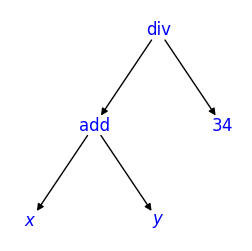

In [112]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.readwrite import json_graph

def makeGraph(x: tuple, nodes: list, labels: list, links: list) -> int:
  id_ = len(nodes)
  nodes.append({'id': id_})
  if isTerminal(x):
    labels[id_] = f'${latex_(x)}$'
  else:
    labels[id_] = x[0]
    for a in x[1:]:
      if isinstance(a, tuple):
        cid = makeGraph(a, nodes, labels, links)
        links.append({'source': id_, 'target': cid})
  return id_

def drawGraph_(x: tuple, size) -> None:
  nodes, labels, links = [], {}, []
  makeGraph(x, nodes, labels, links)
  graph = json_graph.node_link_graph({'nodes': nodes, 'links': links}, directed=True, multigraph=False)
  pos = graphviz_layout(graph, prog="dot")
  fig, ax = plt.subplots(figsize=(3 * size, 3 * size))
  ax.set_axis_off()
  nx.draw_networkx_edges(graph.to_directed(), pos, ax = ax, edge_color="black")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = labels, font_color = "blue")

def drawGraph(x: Expression, size: float = 1) -> None:
  drawGraph_(x.T, size)

x, y = symbol('x'), symbol('y')
drawGraph((x + y) / Z(34))

# Часть 2

### Факторизация

* Напишите функцию `factors(x)`, которая возвращает разложение заданного натурального числа $x$ на простые множители в виде списка этих множителей: factors`(12)` $\to$ `[2, 2, 3]`.

In [113]:
def factors(x: int) -> list:
    multipliers = []
    temp = x
    d = 2
    while temp != 1:
        if temp % d != 0:
            d += 1
        else:
            temp /= d
            multipliers.append(d)
    return multipliers

factors(120)

[2, 2, 2, 3, 5]

* Напишите функцию `factorizeInt(x)`, которая преобразует заданное число `x` в произведение простых сомножителей в форме **выражения** (класс `Expression`), повторяющиеся сомножители должны входить в выражение в форме степеней: `factorizeInt(120)` $\to 2^3\cdot 3\cdot 5$.  

In [114]:
def factorizeInt(x: int) -> Expression:
    multipliers = factors(x)
    multipliers_uniq = sorted(list(set(multipliers)))

    c = multipliers.count(multipliers_uniq[0])
    if c == 1:
        result = Z(multipliers_uniq[0])
    else:
        result = Z(multipliers_uniq[0]) ** Z(multipliers.count(multipliers_uniq[0]))

    for i in range(1, len(multipliers_uniq)):
        c = multipliers.count(multipliers_uniq[i])
        if c == 1:
            result *= Z(multipliers_uniq[i])
        else:
            result *= Z(multipliers_uniq[i]) ** Z(multipliers.count(multipliers_uniq[i]))
    return result
    


show(factorizeInt(7007))

<IPython.core.display.Math object>

### Наибольший общий делитель

* Реализуйте алгоритм Евклида в виде функции `GCD(n, m)`.

In [115]:
def GCD(n: int, m: int) -> int:
    while m > 0:
        n, m = m, n % m
    return n

GCD(120, 48)

24

### Реализация рациональных чисел

* Создаем функцию-конструктор `rational_(n,m)` узлов для рациональных чисел. В каждом таком узле должно храниться нормализованное представление заданного числа.

In [116]:
def rational_(n: int, m: int) -> tuple:
  if n == 0:
    m = 1 # нормализованное представление нуля - (0, 1)
  else:
    if m < 0:
      n, m = -n, -m # знаменатель должен быть положительным
    c = GCD(abs(n), m)
    n, m = n // c, m // c # приводим дробь к несократимому виду
  return 'rational', {'num': n, 'denom': m} # num - числитель (numerator), denom - знаменатель (denominator)

* Пишем функцию `Q(n,m)` для создания выражения, представляющего рациональное число $n/m$. Знаменатель `m` по умолчанию равен `1`.

In [117]:
def Q(n: int, m: int = 1) -> Expression:
  return Expression(rational_(n, m))

Q(2, -6).T

('rational', {'num': -1, 'denom': 3})

* Напишите функцию `latex_rational(x)`, преобразующую рациональное число $x$ в формат LaTeX. Это преобразование должно учитывать, является ли число целым (единичный знаменатель не используется), для отрицательных чисел знак минус ставится перед числом, а не в числителе:
`Q(0, 5)` $\to 0$, `Q(6, -2)` $\to 3$, `Q(6, 8)` $\to \dfrac{3}{4}$, `Q(-15, 25)` $\to -\dfrac{3}{5}$.

In [118]:
def latex_rational(x: tuple) -> str:
  n, m = options(x)['num'], options(x)['denom']
  if n == 0 or m == 1:
    return f"{n}"
  elif n > 0:
    return f"\\frac{{{abs(n)}}}{{{m}}}"
  else:
    return f"-\\frac{{{abs(n)}}}{{{m}}}"

show(Q(0, 5))
show(Q(6, -2))
show(Q(6, 8))
show(Q(-15, 25))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверяем, что рациональные числа могут быть теперь использованы для построения арифметический выражений

In [119]:
show((1 + Q(6, 4)) / (Q(152, 24) ** 2 * Q(5, 7)))

<IPython.core.display.Math object>

### Цепные дроби

* Напишите функцию `continuedTerms(n,m)`, которая преобразует заданное рациональное число $n/m$ в цепную дробь \[$a_0$; $a_1$, $a_2$, ...\] и возвращает результат в виде списка: `continuedTerms(15,11)` $\to$ `[1,2,1,3]`.   

In [120]:
def continuedTerms(n: int, m: int) -> list:
    result = list()
    k = 0
    while m > 0:
        result.append(n // m)
        n, m = m, n % m
        k += 1
    return result


continuedTerms(15, 11)

[1, 2, 1, 3]

* Напишите функцию, которая строит выражение, представляющее цепную дробь, в виде объекта класса `Expression`.

In [121]:
def continuedFraction(p: Expression) -> Expression:
  n, m = options(p.T)['num'], options(p.T)['denom'] # предполагаем, что p - рациональное число!
  A = continuedTerms(n, m) # находим элементы цепной дроби
  result = Z(A[-1])
  for i in range(len(A) - 2, -1, -1):
    result = Z(A[i]) + 1 / result
  return result

show(continuedFraction(Q(15, 11)))

<IPython.core.display.Math object>

* (бонусное задание) Напишите функцию `float2continued(x,n)`, преобразующую заданное действительное число $x$ в цепную дробь "глубины" $n$: `float2continued(np.sqrt(2),4)` $\to 1 + \frac1{2+\frac1{2+\frac1{2}}}$

In [122]:
def float2continued(x: float, n: int) -> Expression:
  elements = list()
  k = 0
  while k < n:
    a = int(x)
    x = 1 / (x - a)
    elements.append(a)
    k += 1
  
  result = Z(elements[-1])
  for i in range(len(elements) - 2, -1, -1):
    result = Z(elements[i]) + 1 / result
  return result

show(float2continued(np.sqrt(2), 4))
show(float2continued(np.pi, 5))
show(float2continued(np.sqrt(2), 5))
show(float2continued(np.exp(1), 5))
show(float2continued((np.sqrt(5)+1)/2, 5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Египетские дроби

* Напишите функцию `egyptianTerms(n,m)` разложения заданного рационального числа $n/m$ (в предположении $n < m$) в египетскую дробь, возвращающую список знаменателей найденных простых дробей: `egyptianTerms(7, 8)` $\to$ `[2, 3, 24]`.

In [123]:
def egyptianTerms(n: int, m: int) -> list:
  ...

egyptianTerms(7, 8)

* Напишите функцию, которая строит выражение, представляющее египетскую дробь, в виде объекта класса `Expression`: `egyptianSum(7,8)` $\to \frac12 + \frac13 + \frac1{24}$.

In [124]:
def egyptianSum(p: Expression) -> Expression:
  n, m = options(p.T)['num'], options(p.T)['denom']
  A = egyptianTerms(n, m)
  ...

show(egyptianSum(Q(7, 8)))

AttributeError: 'NoneType' object has no attribute 'T'

### Частичное оценивание арифметических выражений

В большинстве систем КА выражения, заданные пользователем, сразу же упрощаются, в частности, в них вычисляется все, что может быть вычислено.
В частности, если выражение является арифметическим и содержит только целые и рациональные числа, то это выражение преобразуется в рациональное число, например: $$\frac{\frac12+\frac23}{5}\to\frac7{30}.$$
Определим несколько функций, предназначенных для такого оценивания (evaluating) арифметических выражений над целыми и рациональными числами.

* Головная функция `evaluate(x)` оценивает выражение, заданное пользователем в виде объекта класса `Expression`, и возвращает выражение того же самого типа (класса), вызывая внутреннюю функцию `eval_` оценивания выражения в *списочном* формате.

In [ ]:
def evaluate(x: Expression) -> Expression:
  return Expression(eval_(x.T))

* Функция `eval_(x)` “пытается” вызвать обработчик соответствующего узла, и если такой обработчик есть, то возвращается результат его работы.
Если обработчика нет (срабатывает исключение), то возвращается исходный узел.


In [ ]:
def eval_(x: tuple) -> tuple:
  try:
    cmd = eval(f"eval_{ID(x)}") # конструируем функцию оценивания текущего узла по его ID
    return cmd(x)
  except:
    return x # возвращаем исходный узел, если обработчик не найден

* Для упрощения выполнения арифметических операций над объектами разной природы (числа разных классов, многочлены, матрицы) определим набор функций для автоматического преобразования типов (cast).
Головная функция `cast` пытается вызвать подходящий обработчик, исходя из идентификатора типа и целевого типа.

In [ ]:
def cast_(x: tuple, target: str) -> tuple:
  if ID(x) == target:
    return x # преобразование не нужно, узел x уже имеет правильный тип
  try:
    cmd = eval(f"cast_{ID(x)}_{target}") # конструируем функцию преобразования
    return cmd(x)
  except:
    return x # возвращаем исходный узел, если обработчик не найден

* Реализуем один конкретный преобразователь `cast_integer_rational(x)`, который переводит целое число $x$ в формат рационального числа.

In [ ]:
def cast_integer_rational(x: tuple) -> tuple:
  n = options(x)['value']
  return rational_(n, 1)

cast_integer_rational(integer_(5))

* Теперь можно создавать функции, выполняющие арифметические операции над целыми и рациональными числами. Определим две функции сложения. Имя каждой такой функции должно состоять из типа операции и списка типов операндов, разделенных знаком подчеркивания: `add_integer_integer` складывает два целых числа.

In [ ]:
def add_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n + m)

def add_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb + nb * ma, ma * mb
  return rational_(n, m)

* Создадим словарь `OPERATIONS`, в котором будут перечисляться все обработчики каждой бинарной и унарной операций, подлежащих оцениванию. Ключами записей будут типы операций, значениями - списки соответствующих обработчиков.

In [ ]:
OPERATIONS = {'add': ['add_integer_integer', 'add_rational_rational']}

* Создаем универсальный обработчик (оцениватель) бинарных операций `eval_binary(op,x,y)`, который просматривает список всех имеющихся обработчиков заданной операции `op`, для каждого из них пытается преобразовать заданные операнды `x` и `y` к соответствующим типам, если преобразование проходит успешно, то вызывает этот обработки и возвращает его результат. Если ни один из обработчиков не срабатывает, то возвращается исходное выражение.   

In [ ]:
def eval_binary(op: str, x: tuple, y: tuple) -> tuple:
  for fop in OPERATIONS[op]:
    idx, idy = fop.split('_')[1:]
    a = cast_(x, idx)
    b = cast_(y, idy)
    if ID(a) == idx and ID(b) == idy:
      cmd = eval(f"{fop}")
      return cmd(a, b)
  return op, x, y

* Наконец, пишем оцениватель `eval_add` операции сложения, который оценывает (рекурсивно) свои операнды и вызывает универсальный обработчик `eval_binary`. Проверяем его работу. Объясните, почему не происходит оценивания в последнем примере!

In [ ]:
def eval_add(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) + Q(1, 3)))
x = symbol('x')
show(evaluate(Z(2) + Z(5) + x))
show(evaluate(x + Z(2) + Z(5)))

* Чтобы добавить в систему обработку новых операций (например, операции умножения), нужно 1) создать соответствующие исполнители (умножение целых чисел, умножение рациональных чисел); 2) включить эти исполнители в словарь `OPERATIONS`; 3) написать обработчик соответствующего узла (`eval_mul`), если эта операция бинарная, то в данном обработчике должна вызываться функция `eval_binary`. Для примера добавим в систему оценивание операции умножения.

In [ ]:
def mul_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n * m)

def mul_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return rational_(n, m)

OPERATIONS |= {'mul': ['mul_integer_integer', 'mul_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_mul(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) * Z(5)))
show(evaluate(Z(2) * Q(2, 3)))

* Реализуйте по этой же схеме оценивание операций вычитания и деления целых и рациональных чисел. Учтите, что при делении двух целых чисел может получиться целое число: $6/3 \to 2$, а может - рациональное: $12/8$ $\to \frac{3}{2}$.

In [ ]:
# вычитание

...

show(evaluate(Z(2) - Q(2, 7)))

In [ ]:
# деление

...

show(evaluate(Z(6) / Z(3)))
show(evaluate(Z(6) / Z(4)))
show(evaluate(Q(5,12) / Q(10,81)))
show(evaluate((Z(6) - Q(1, 2)) / Q(2, 3)))

* Реализуйте оценивание операции возведения в целую степень: `Z(2) ** Z(3)` $\to 8$, `Z(2) ** Z(-3)` $\to \frac{1}{8}$, `Q(2, 3) ** Z(-2)` $\to \frac{9}{4}$.

In [ ]:
...

show(evaluate(Z(6) ** Z(3)))
show(evaluate(Z(6) ** Z(-2)))
show(evaluate(Q(2, 3) ** Z(-2)))

* (бонусное задание) Реализуйте оценивание операции возведения в рациональную степень, при условии, что соответствующие корни могут быть извлечены: `Z(8) ** Q(1, 3)` $\to 2$, `Q(4, 9) ** Q(-3, 2)` $\to \frac{27}{8}$. **Но** `Z(4) ** Q(1, 3)` $\to 4^{\frac{1}{3}}$  - операция не может быть оценена.

In [ ]:
...

show(evaluate(Z(25) ** Q(3, 2)))

* (бонусное задание) Реализуйте по аналогичной схеме универсальный оцениватель унарных операций `eval_unary` и оцениватель операции `neg` (унарный минус) для целых и рациональных чисел.  

In [ ]:
...

show(-Z(-2))
show(-Q(3, 4))